# Quality Control Plotting

In [1]:
here::i_am("01_paper_QC.ipynb")

source(here::here("settings.R"))
source(here::here("utils.R"))

here() starts at /rds/project/rds-SDzz0CATGms/users/bt392/01_Eomes_RNA/code



In [2]:
io$basedir

[1] "/rds/project/rds-SDzz0CATGms/users/bt392/01_Eomes_RNA"

In [3]:
args = list()
args$meta = file.path(io$basedir, 'results/rna/doublet_detection/sample_metadata_after_doublets.txt.gz')
args$sce = io$rna.sce

In [11]:
summary(names(opts$sample2pool) == names(opts$sample2tomato))

   Mode    TRUE 
logical       8 

In [20]:
sample_rename[order(sample_rename)]

SLX-20795_SITTH11_HKTG2DRXY SLX-20795_SITTA12_HKTG2DRXY 
                 "pool1_KO"                  "pool1_WT" 
SLX-20795_SITTG10_HKTG2DRXY SLX-20795_SITTH10_HKTG2DRXY 
                 "pool2_KO"                  "pool2_WT" 
SLX-20795_SITTF11_HKTG2DRXY SLX-20795_SITTG11_HKTG2DRXY 
                 "pool3_KO"                  "pool3_WT" 
SLX-20795_SITTA11_HKTG2DRXY SLX-20795_SITTB11_HKTG2DRXY 
                 "pool4_KO"                  "pool4_WT"

In [28]:
sample_rename = paste0(opts$sample2pool, '_', ifelse(opts$sample2tomato == TRUE, 'KO', 'WT'))
names(sample_rename) = names(opts$sample2pool)

sample_colors = c(
    'pool1_KO' = '#8B0000',
    'pool1_WT' = '#000000',
    'pool2_KO' = '#B10000',
    'pool2_WT' = '#4C4C4C',
    'pool3_KO' = '#D80000',
    'pool3_WT' = '#989898',
    'pool4_KO' = '#FF0000',
    'pool4_WT' = '#E5E5E5'
)

In [29]:
black_palette <- colorRampPalette(c("black", "gray90"))(4)  # 5 shades of black
red_palette <- colorRampPalette(c("red4", "red"))(4)       # 3 shades of red

# Combine the palettes
custom_palette <- c(black_palette, red_palette)

# Print the custom palette
print(custom_palette)

[1] "#000000" "#4C4C4C" "#989898" "#E5E5E5" "#8B0000" "#B10000" "#D80000"
[8] "#FF0000"


In [30]:
meta <- fread(args$meta) %>% 
  .[pass_rnaQC==TRUE & doublet_call==FALSE]  %>% 
    .[,sample_clean := factor(sample_rename[match(sample, names(sample_rename))], levels = sample_rename[order(sample_rename)])]

In [37]:
# Define a custom theme
theme = theme(
  # axis.title = element_text(color = 'black', size = 7),
  axis.title = element_blank(),
  axis.text.x = element_text(angle=90, hjust=1, vjust=0.5, size=5, color = 'black'), 
  axis.text = element_text(size=5, color='black'),
  text = element_text(size=5),
  plot.margin = margin(0, 3, 0, 0),  # Adjust the margin around the plot
  plot.title = element_text(size=7, face='plain', hjust=0.5, vjust = -0.5),
  panel.border = element_rect(color='black', linewidth=0.5, fill = NA),
  panel.background = element_blank(),
  panel.grid.major = element_line(color = 'grey95'),
  axis.line = element_blank(),
  axis.ticks = element_line(linewidth=0.25, color = 'black'),
  legend.position = 'none'
)

# Create a list of common geoms
geoms <- list(
  geom_violin(linewidth = 0.1, aes(fill = sample_clean)),
  geom_boxplot(width = 0.2, linewidth = 0.1, outlier.shape = NA, fill = 'white'),
  scale_fill_manual(values = sample_colors) 
)

p_rna_reads = ggplot(meta, aes(sample_clean, log(nCount_RNA))) + 
    geoms + 
    ggtitle('Log(# counts)') + 
    theme

p_rna_genes = ggplot(meta, aes(sample_clean, log(nFeature_RNA))) + 
    geoms + 
    ggtitle('Log(# genes)') + 
    theme

p_rna_ribo = ggplot(meta, aes(sample_clean, ribosomal_percent_RNA)) + 
    geoms + 
    ggtitle('% Ribo counts') + 
    theme

p_rna_mito = ggplot(meta, aes(sample_clean, mitochondrial_percent_RNA)) + 
    geoms + 
    ggtitle('% Mito counts') + 
    theme

options(repr.plot.height=7, repr.plot.width=25)
p1 = ggarrange(p_rna_reads, p_rna_genes, p_rna_mito, p_rna_ribo, nrow = 1, align = 'hv')


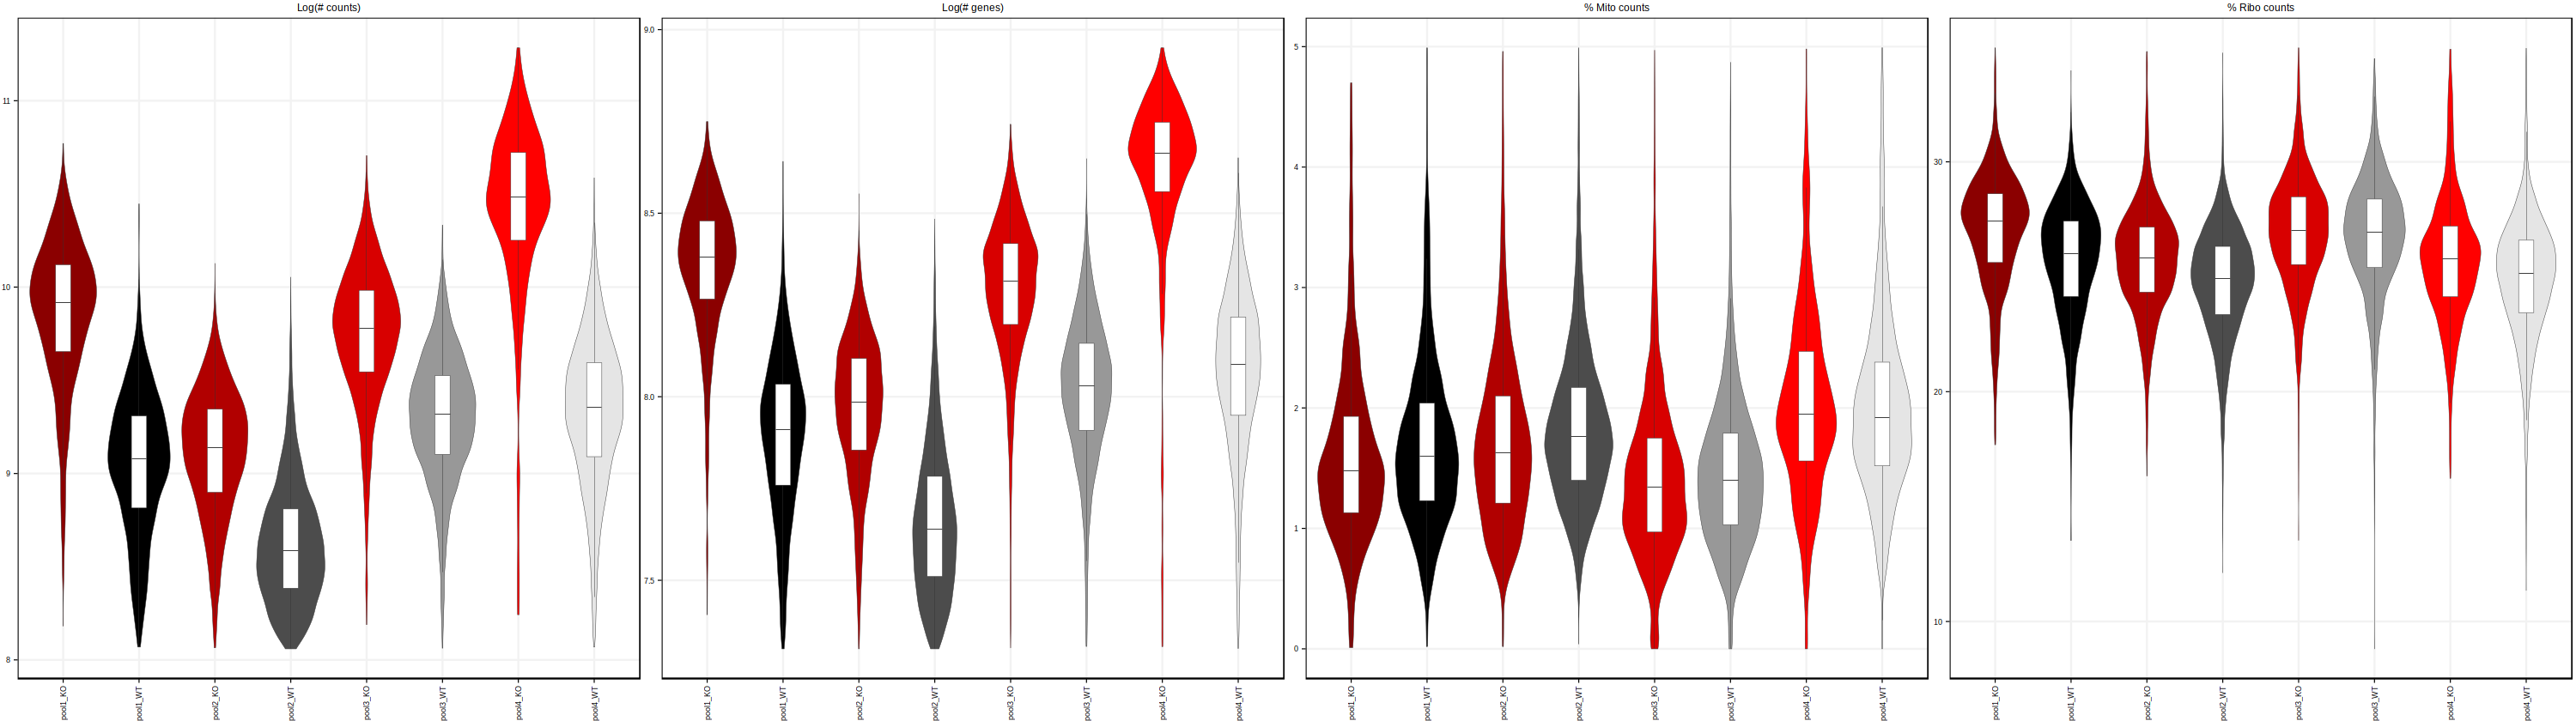

In [38]:
p1

In [39]:
ggsave(file.path(io$basedir, 'figures/Eomes_chimera_QC_metrics.pdf'), 
       plot = p1,
       width = 115, 
       height = 40, 
       units = "mm")